In [1]:
from OFDM import *
%matplotlib inline

In [2]:
# Create random bit stream, bits are length 10x OFDM symbol length - 0's

ofdm_symbol_size = 1024
cp_length = ofdm_symbol_size // 4
modulation = "QPSK"
pilots_per_block = 8
pilot_value = 1 + 1j

In [3]:
tx = transmitter(ofdm_symbol_size, cp_length, modulation, P=pilots_per_block, pilot_value=pilot_value)

no_bits = 75 * tx.bits_per_symbol
bits = np.random.binomial(n=1, p=0.5, size=(no_bits, ))

signal = tx.transmit(bits, graph_output=False)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               256 
Modulation method:                  QPSK
Number of bits to transmit:         66900
Number of OFDM symbols to transmit: 75


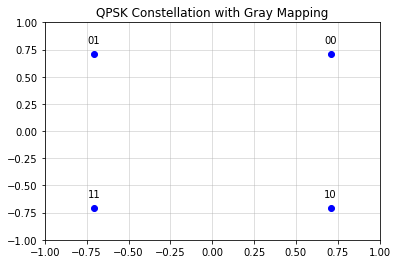

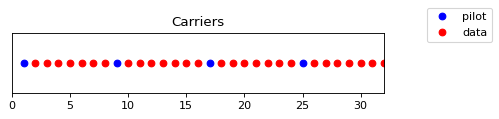

In [4]:
#scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, fsweep)

#signal = play_record(tx, fs=tx.fs, padding_before = 1,padding_after=1)

tx.graphs()

In [5]:
signal_rx = play_record(signal, tx.fs)
#signal_rx = np.convolve(signal, np.array([1,0,3+3j]), )

Recording...
Finished recording


------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               256 
Modulation method:                  QPSK


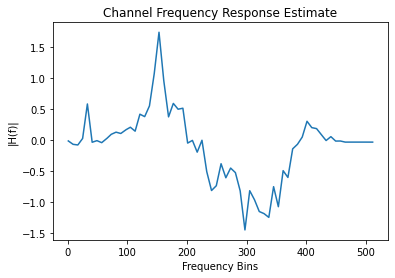

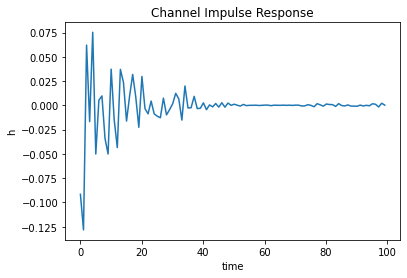

In [6]:
rx = receiver(ofdm_symbol_size, cp_length, modulation, P=pilots_per_block, pilot_value=pilot_value)

rx_bits = rx.receive(signal_rx)
rx.graphs()

In [7]:
errs = np.sum(abs(bits-rx_bits))
errs/len(bits)

0.10901345291479821

(100, 1024)
511


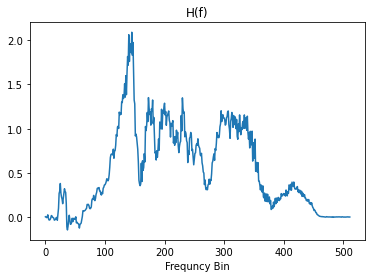

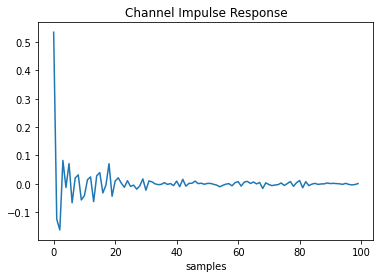

In [264]:


rx_p = rx.reshape(-1,prefix_length+ofdm_symbol_size)

rx_p_nocp = rx_p[:,prefix_length:]

print(rx_p_nocp.shape)
rx_symbols = FFT(rx_p_nocp)
rx_symbols = rx_symbols[:,1:no_data_carriers+1]

H = rx_symbols / QPSK


print(H.shape[1])

for i in range(0,H.shape[1]):
    avg.real[i] = np.mean(H[:,i].real)
    avg.imag[i] = np.mean(H[:,i].imag)

plt.plot(np.arange(0,len(avg)), avg.real)
plt.title("H(f)")
plt.xlabel("Frequncy Bin")
plt.savefig("plots/channe_freq_response.jpg")
plt.show()
plt.plot(np.arange(0,100),np.fft.ifft(avg).real[:100])
plt.title("Channel Impulse Response")
plt.xlabel("samples")
plt.savefig("plots/channel_impulse_response.jpg")
plt.show()


In [53]:
x = np.arange(1,512)
n = 8
K = 513
y = x[::n]
y = np.append(y,x[-1])
print(len(y))
y

65


array([  1,   9,  17,  25,  33,  41,  49,  57,  65,  73,  81,  89,  97,
       105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201,
       209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305,
       313, 321, 329, 337, 345, 353, 361, 369, 377, 385, 393, 401, 409,
       417, 425, 433, 441, 449, 457, 465, 473, 481, 489, 497, 505, 511])